<a href="https://colab.research.google.com/github/sanyamja1n/Zomato-Restaurant-Clustering/blob/main/Zomato_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import spacy

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import time

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px
import re
import string
!pip install contractions
import contractions
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords


from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# Loading the data
meta_df = pd.read_csv('/content/drive/MyDrive/Sample Data/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Sample Data/Zomato Restaurant reviews.csv')

In [37]:
# Dataset First Look
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [38]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [39]:
# Dataset Rows & Columns count
meta_df.shape

(105, 6)

In [40]:
reviews_df.shape

(10000, 7)

In [41]:
# Dataset Info
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [42]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [43]:
# Dataset Duplicate Value Count
meta_df.duplicated().sum()

0

In [44]:
reviews_df.duplicated().sum()

36

In [45]:
#Dropping Duplicates
reviews_df.drop_duplicates(inplace = True)

In [46]:
# Missing Values/Null Values Count
meta_df.isnull().sum() # Checking null values

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [47]:
#Since more than 50% of the collection column data is missing so we will drop this column
meta_df.drop('Collections', axis = 1, inplace = True)

In [48]:
reviews_df.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [49]:
# Removing the null value
reviews_df.dropna(inplace= True)

In [50]:
# Dataset Columns
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings'], dtype='object')

In [51]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [52]:
# Dataset Describe
reviews_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,9955,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9955,7442,Ankita,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9955,10,5,3826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9955,2477,1 Review,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9955,9775,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,9955.0,NaN,NaN,NaN,0.751984,2.575691,0.0,0.0,0.0,0.0,64.0


In [53]:
meta_df.describe()

,Name,Links,Cost,Cuisines,Timings
count,105,105,105,105,104
unique,105,105,29,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,6


In [54]:
# checking for unique values in cost
meta_df.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [55]:
# Check Unique Values for each variable.
reviews_df.nunique()

Restaurant     100
Reviewer      7442
Review        9364
Rating          10
Metadata      2477
Time          9775
Pictures        36
dtype: int64

In [56]:
reviews_df['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [57]:
meta_df.nunique()

Name        105
Links       105
Cost         29
Cuisines     92
Timings      77
dtype: int64

In [58]:
# changing the data type of the cost
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

In [59]:
# remove the row with rating 'Like' as only 1 row has this value and then converting rating datatype to float
reviews_df = reviews_df[reviews_df['Rating'] !='Like']
reviews_df['Rating'] = reviews_df['Rating'].astype(float)

In [60]:
#Splitting "Metadata" column into reviews and followers column
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [61]:
#Converting "Time" column datatype to datetime and then extracting Year, month, day and hour from it
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Day'] = pd.DatetimeIndex(reviews_df['Time']).day
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [62]:
#checking for null values
reviews_df.isna().sum()

Restaurant       0
Reviewer         0
Review           0
Rating           0
Time             0
Pictures         0
Reviews          0
Followers     1574
Year             0
Month            0
Day              0
Hour             0
dtype: int64

In [63]:
# filling the nan values of followers by 0
reviews_df['Followers'].fillna(0,inplace=True)

In [64]:
# Making list of cuisine
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [65]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 

In [66]:
# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'}).sort_values('Number of Restaurants', ascending= False)

In [67]:
cuis_df

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


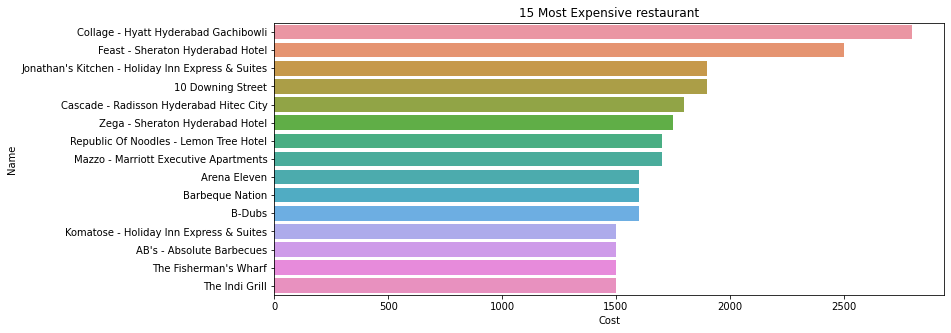

In [68]:
# checking most expensive
plt.figure(figsize = (12,5))
sns.barplot(data = meta_df.sort_values(by = 'Cost',ascending = False)[:15], 
            y= 'Name', 
            x= 'Cost' )
plt.title('15 Most Expensive restaurant')
plt.show()

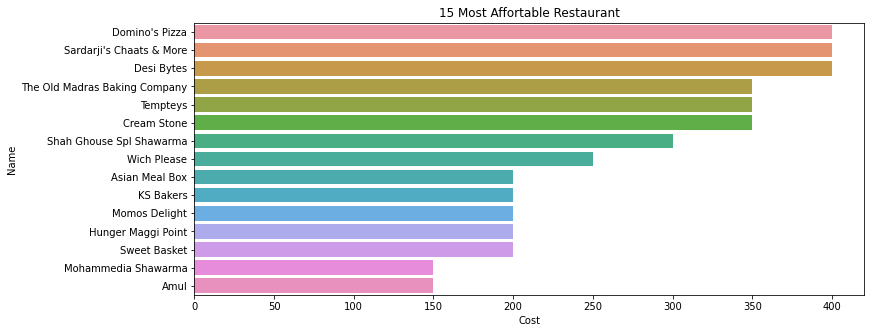

In [69]:
# checking  most afforatble Resturent
plt.figure(figsize = (12,5))
sns.barplot(data = meta_df.sort_values(by = 'Cost',ascending = False)[-15:], 
            y= 'Name', 
            x= 'Cost' )
plt.title('15 Most Affortable Restaurant')
plt.show()

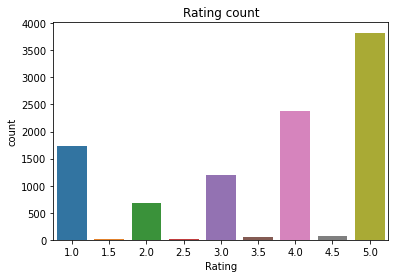

In [70]:
sns.countplot(reviews_df.Rating)
plt.title('Rating count')
plt.show()

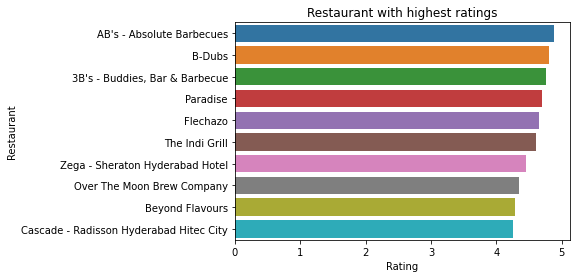

In [71]:
# Restaurant with highest avg ratings
sns.barplot(data = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False)[:10],
            y = 'Restaurant', 
            x = 'Rating')
plt.title('Restaurant with highest ratings')
plt.show()

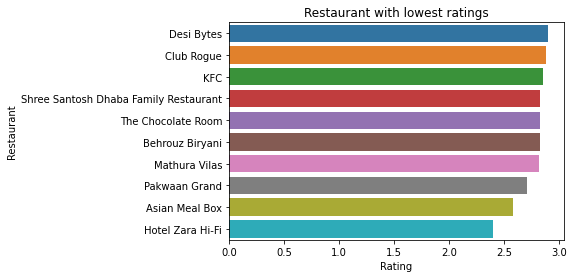

In [72]:
# Restaurant with lowest avg ratings
sns.barplot(data = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False)[-10:],
            y = 'Restaurant', x = 'Rating')
plt.title('Restaurant with lowest ratings')
plt.show()

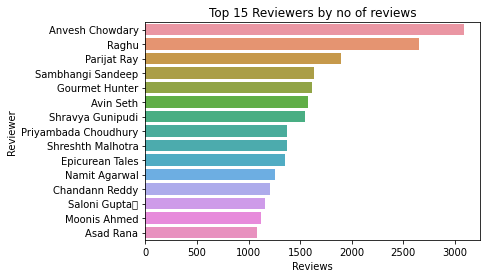

In [73]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews': 'sum', 'Followers':'sum', 'Rating': 'mean'}).reset_index()

# Top 15 reviewers by review count
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')
plt.show()


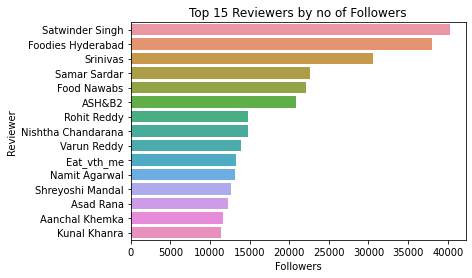

In [74]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')
plt.show()

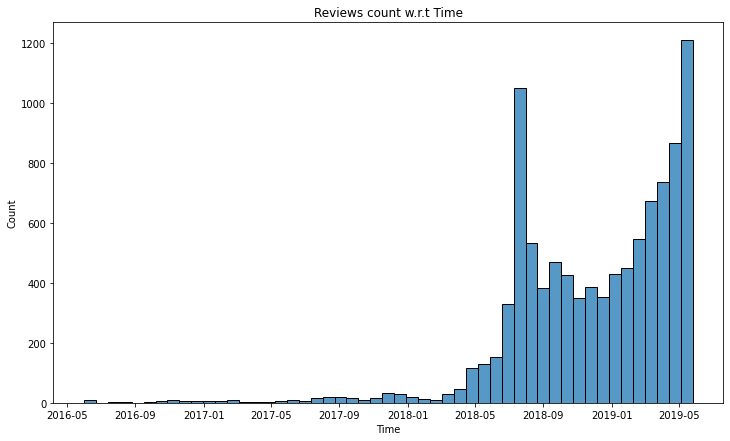

In [75]:
# Hist plot on Time columns
plt.figure(figsize = (12,7))
sns.histplot(reviews_df.Time)
plt.title('Reviews count w.r.t Time')
plt.show()

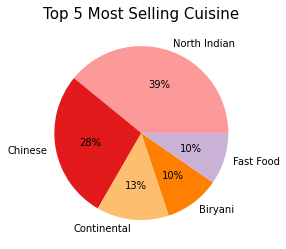

In [76]:
data = cuis_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:5]

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =15, color= 'black')
plt.show()

In [77]:
#merging both data frame
meta1 = meta_df.rename(columns = {'Name':'Restaurant'})
merged = meta1.merge(reviews_df, on = 'Restaurant')
merged.shape

(9954, 16)

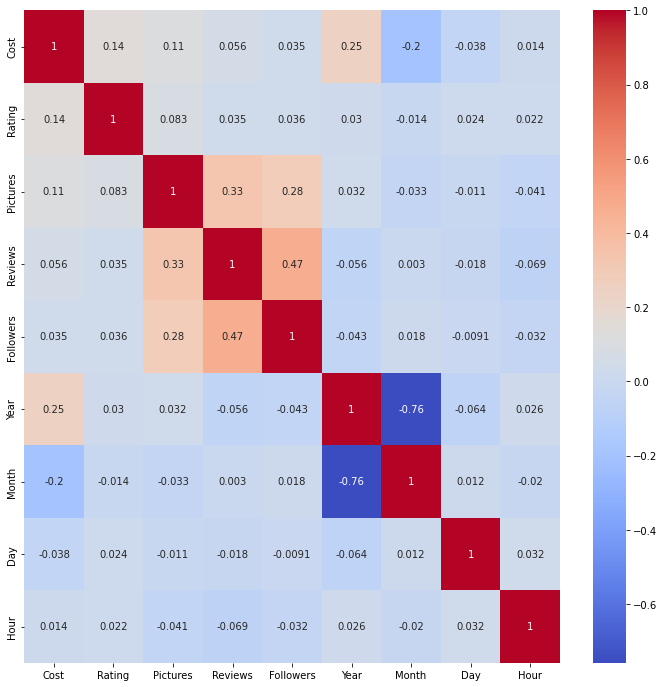

In [78]:
plt.figure(figsize = (12,12))
sns.heatmap(merged.corr(), annot=True, cmap = 'coolwarm')

plt.show()